In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
minian_runtimes = pd.Series({
    'Loading video': 5.83349+0.20120,
    'Background removal': 57.95252,
    'Rechunking video': 56.94712,
    'Initialization': 499.54473,
    'First update': 423.60918,
    'Second update': 294.06991
})

In [66]:
minian_runtimes.sum()//60, minian_runtimes.sum()%60

(22.0, 18.158149999999978)

In [70]:
24186/20/60, 24186/20%60

(20.154999999999998, 9.299999999999955)

In [24]:
np.cumsum(minian_runtimes)-minian_runtimes

Loading video            0.00000
Background removal       6.03469
Rechunking video        63.98721
Initialization         120.93433
First update           620.47906
Second update         1044.08824
dtype: float64

In [25]:
np.cumsum(minian_runtimes)

Loading video            6.03469
Background removal      63.98721
Rechunking video       120.93433
Initialization         620.47906
First update          1044.08824
Second update         1338.15815
dtype: float64

In [31]:
np.cumsum(minian_runtimes)-minian_runtimes*0.5

Loading video            3.017345
Background removal      35.010950
Rechunking video        92.460770
Initialization         370.706695
First update           832.283650
Second update         1191.123195
dtype: float64

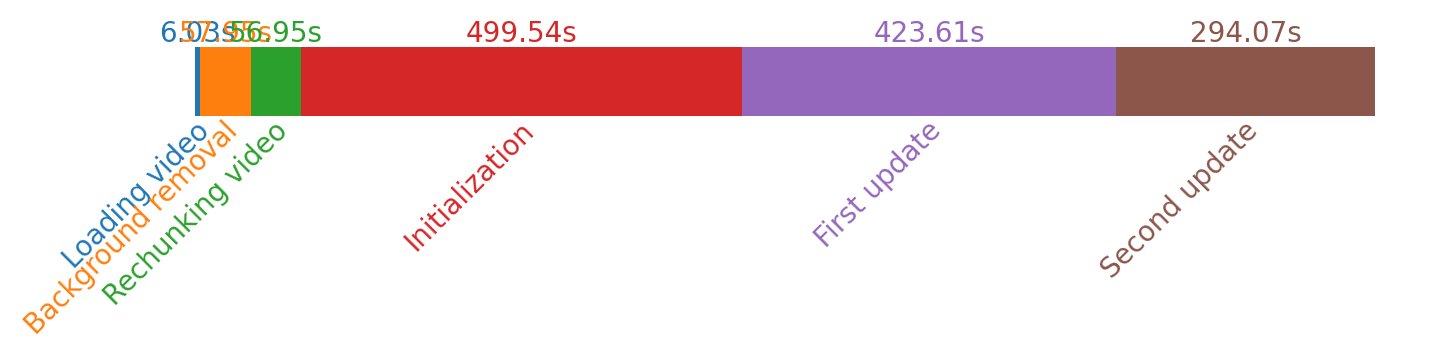

In [67]:
plt.figure(figsize=(8, 0.5), dpi=200)
plt.barh(np.zeros(6), minian_runtimes,
        left=np.cumsum(minian_runtimes)-minian_runtimes,
        color=[f"C{i}" for i in range(6)])
plt.axis("off")
for x, lbl, tm, col in zip(np.cumsum(minian_runtimes)-minian_runtimes*0.5,
                           minian_runtimes.index,
                           minian_runtimes,
                           [f"C{i}" for i in range(6)]):
    plt.text(x+20, -0.4, lbl, ha="right", va="top", rotation=45, color=col)
    plt.text(x, 0.4, f"{tm:.2f}s", ha="center", va="bottom", color=col)
#plt.tight_layout()

<AxesSubplot:>

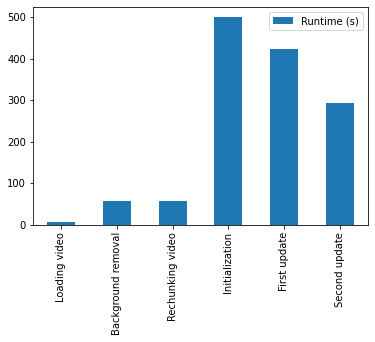

In [14]:
minian_runtimes.rename("Runtime (s)").to_frame().plot.bar(stacked=True)

<AxesSubplot:ylabel='Runtime (s)'>

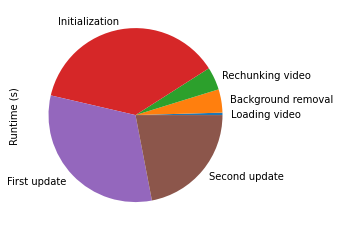

In [16]:
minian_runtimes.rename("Runtime (s)").plot.pie()